## Question 1. 

A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.
Please assist the consultant in the area of statistical analysis by doing this; 

a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of
findings (parametric/non- parametric). 
Correlation and ANOVA, if applicable, is a must.

b. A graphical analysis of the additives, including a distribution study.

c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import scipy.stats as stats
from pingouin import kruskal 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [82]:
#Load Data

df= pd.read_csv('ingredient.csv')
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
a    214 non-null float64
b    214 non-null float64
c    214 non-null float64
d    214 non-null float64
e    214 non-null float64
f    214 non-null float64
g    214 non-null float64
h    214 non-null float64
i    214 non-null float64
dtypes: float64(9)
memory usage: 15.2 KB


In [84]:
#Summary table
desc = []
for i in df.columns:
    desc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((df[i].isna().sum())/len(df)*100,2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPercentage', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,a,float64,0,0.0,178,"[1.52099, 1.51665]"
1,b,float64,0,0.0,142,"[12.57, 13.25]"
2,c,float64,0,0.0,94,"[3.53, 3.56]"
3,d,float64,0,0.0,118,"[2.17, 2.68]"
4,e,float64,0,0.0,133,"[72.85, 72.95]"
5,f,float64,0,0.0,65,"[0.39, 0.15]"
6,g,float64,0,0.0,143,"[8.62, 8.09]"
7,h,float64,0,0.0,34,"[3.15, 0.0]"
8,i,float64,0,0.0,32,"[0.1, 0.19]"


There are no missing value in the data

To determine whether there are any statistically significant differences between the formulation, I calculate all the additives and store it as formula feature. At this point, since we have no obvious common grouping, I classify the formula feature into some classes based on quartiles information showed in descriptive table. 

In [85]:
#create a new variable named formula by adding varying levels of additives 
df['formula'] =df['a']+ df['b']+ df['c']+ df['d']+df['e']+ df['f']+df['g']+ df['h']+ df['i']

df.describe()

,a,b,c,d,e,f,g,h,i,formula
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,101.392664
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.122704
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,100.536430
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,101.326570
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,101.407095
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,101.480658
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,101.621520


In [86]:
# classify the formula based on quartiles in describe table.  

def create_group(col):
    if col<=101.326570:
        return 'first'
    elif col>101.326570 and col<=101.407095:
        return 'second'
    elif col>101.407095 and col<=101.480658:
        return 'third'
    elif col >101.480658:
        return 'last'
    
#create a new variable called group based on formula 
df['group']=df['formula'].apply(create_group)
    
    

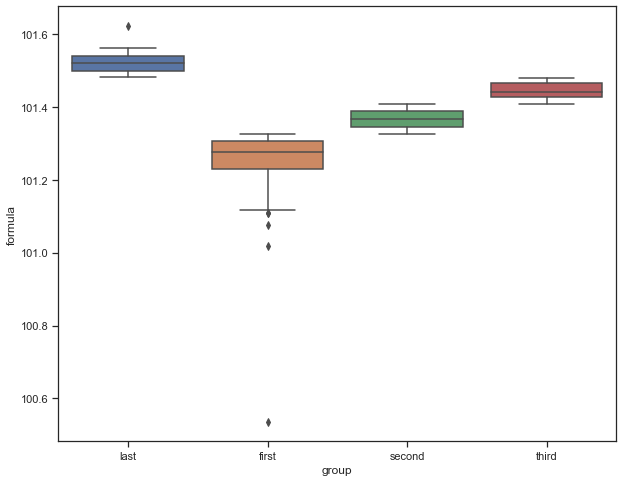

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(df['group'], df['formula'])

The box plots constructed from the data shows the distribution of each  group.

### Univariate Analysis

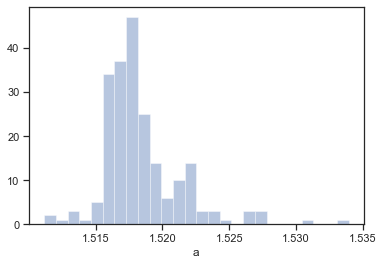

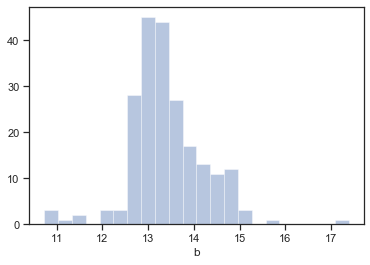

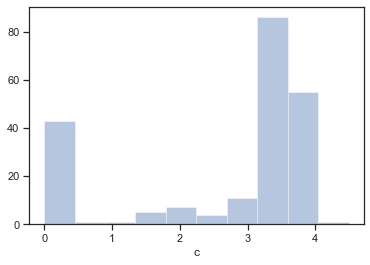

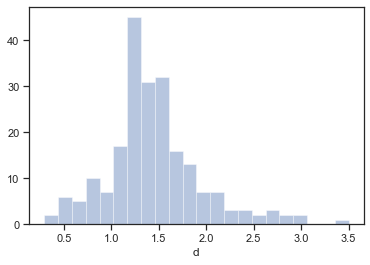

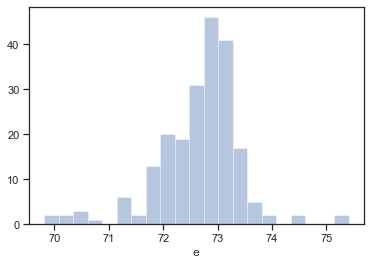

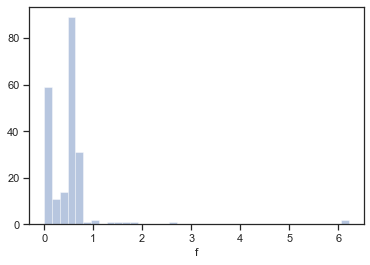

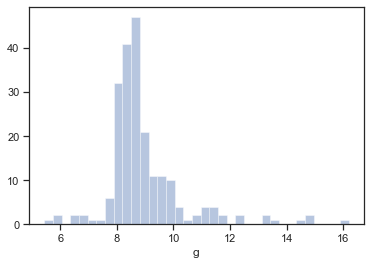

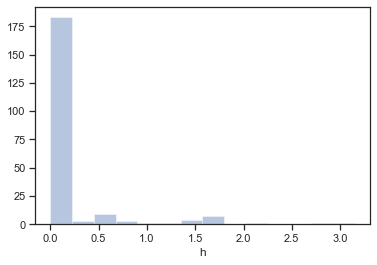

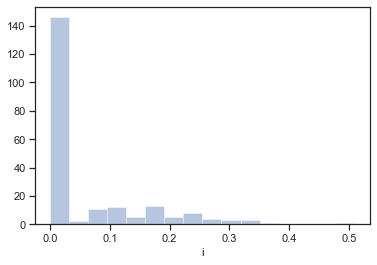

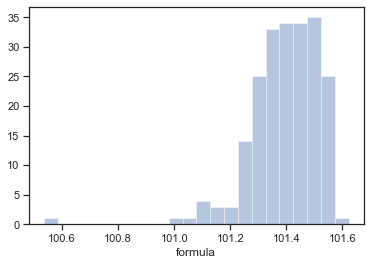

<Figure size 432x288 with 0 Axes>

In [88]:
# Check for Distribution 
    
for item in df.columns.drop(['group']):
    sns.distplot(df[item], kde=False)
    plt.show()
    plt.tight_layout()

From the histogram above, it can be seen that almost all of the features don't follow the normal distribution. 
We will validate with the normality test later

## Statistical Proof

The purpose of this analysis was to verify if the formulations are significantly different. Thus, the null hypothesis (Ho) states that the means of formulations to be tested are equal. The alternative hypothesis is the means of formulations are significantly different. To test this hypothesis, we apply ANOVA test.  

Analysis of variance (ANOVA) is used to compare the means of more than 2 groups with assumptions:
1. The population must be a normal distribution.
2. Homogeneity of variance : the variance among the groups should be equal.


(1) Normality

Normality is tested using Shapiro-Wilk test. The result returns the test statistic and p-value.
If the p-value is greater than  0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution.


In [97]:
stats.shapiro(df['a']), stats.shapiro(df['b']), stats.shapiro(df['c']),stats.shapiro(df['d']),
stats.shapiro(df['e']),stats.shapiro(df['f']),stats.shapiro(df['g']),stats.shapiro(df['h']),stats.shapiro(df['i'])

((0.8675720691680908, 1.0766432233591527e-12),
 (0.9457624554634094, 3.4656832781365665e-07),
 (0.6993362307548523, 2.3908993861355223e-19),
 (0.9434126615524292, 2.083195624891232e-07),
 (0.9196613430976868, 2.174813440447565e-09),
 (0.4416174292564392, 2.1721748481042377e-25),
 (0.7938680648803711, 4.2866537515527225e-16),
 (0.4085649847984314, 5.383263238128378e-26),
 (0.653200089931488, 1.156668784076633e-20))

The result above shows the p-value of all features less than 0.05, this is an indication that the data is not normally distributed.

(2) Variance

To test for variance, the Levene test is conducted by calling the scipy stats.levene() . The null hypothesis of this test assumes that all samples come from populations with equal variances. If the p-value is more than 0.05, then we have met the assumption of homogeneity of variance and can conduct a one-way ANOVA. However, If the p-value is less than 0.05, the variances are significantly different and the homogeneity of variance assumption has been violated


In [90]:
stats.levene(df['formula'][df['group'] == 'first'], 
               df['formula'][df['group'] == 'second'], 
               df['formula'][df['group'] == 'third'],
               df['formula'][df['group'] == 'last'])

LeveneResult(statistic=8.219296119838177, pvalue=3.382163702559326e-05)

Here, the p-value is less than 0.05, thus we reject the null hypothesis, and conclude that there are significant differences among the group variances

Since all the test results didn't meet the ANOVA criteria, we use non parametric procedure that do not require normality and equivalent with ANOVA, named Kruskal-Wallis. 


### Kruskal Wallis 


In [91]:
kruskal(data=df, dv='formula', between='group')

,Source,ddof1,H,p-unc
Kruskal,group,3,199.689,4.925421e-43


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there are significant differences of formulations among groups

### Correlation 

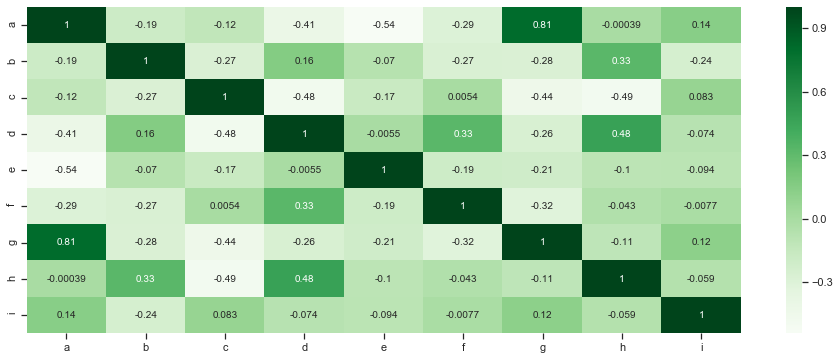

In [92]:
plt.figure(figsize=(16,6))
sns.heatmap(df.drop(['formula'], axis=1).corr(method='pearson'),cmap='Greens',annot=True)
plt.show()

The heatmap reveals the correlation between the 'a' and 'g' features is very high.
The features of 'd' and 'h', 'f' and d also show a good degree of correlation. In other hand, the correlation between 'd' and 'e', 'd' and 'i', 'h' and 'a' feature are low.


### Summary 

1. This data doesn’t fits a normal distribution. Therefore non parametric test was performed.
2. The Kruskal Wallis result give a conclusion that there are significant differences in formulation among groups.
3. The 'a' and 'g' feature show the highest correlation  
4. The 'd' and 'h' feature also show a high degree of correlation 


K-Means Clustering

Text(0, 0.5, 'Inertia')

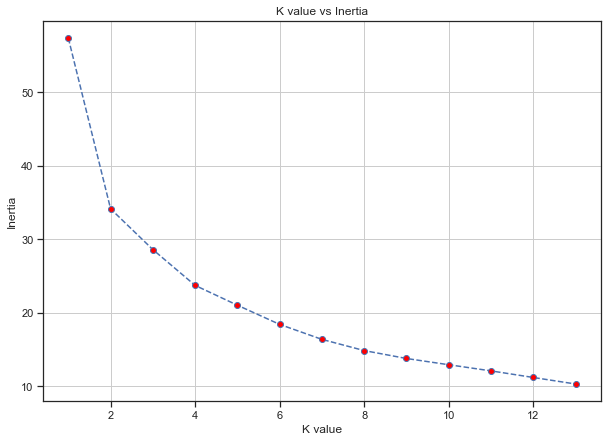

In [93]:
# normalize the data using a min-max scaler before clustering.

ms= MinMaxScaler()
X = ms.fit_transform(df[['a', 'b','c','d','e','f','g','h','i']])

#Find the optimum cluster using elbow method 

inertia_list= []
      
for i in range(1,14):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,14),inertia_list,marker='o',markerfacecolor='red',linestyle='dashed')
plt.grid()
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

As we see 3 is the optimal number of cluster where the score has become constant.

In [94]:
#modelling

kmeans = KMeans(n_clusters=3, random_state=101)
y_kmeans= kmeans.fit_predict(X)

In [95]:
centroids= kmeans.cluster_centers_
df_kmeans = df.copy()
df_kmeans['Category'] = kmeans.labels_
df_kmeans.head()

,a,b,c,d,e,f,g,h,i,formula,group,Category
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,101.54735,last,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,101.48125,last,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,101.54300,last,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,101.28768,first,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,101.32813,second,0


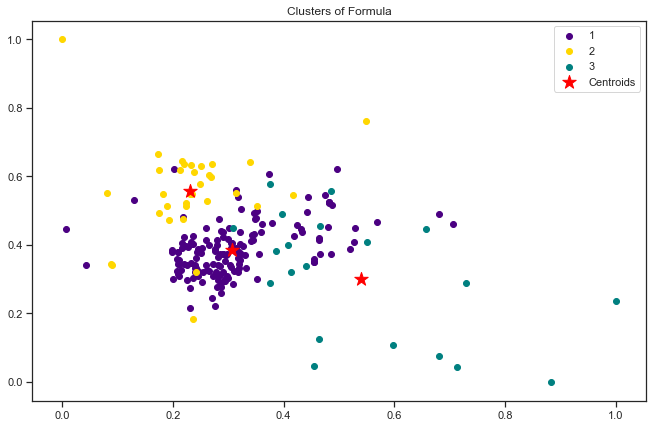

In [96]:
### distribution from centroids (for each cluster)

plt.figure(figsize=(11,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='indigo',label='1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='gold', label='2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='teal',label='3')

plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='*',s=200,label='Centroids')
plt.title('Clusters of Formula')
plt.legend()
plt.show()